# Some plots of index trends and all events compounding trends

This file grabs the warm season indeces and sees if this shows us anything


You need to run cmipIndeces.ipnyb first

In [23]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins


In [24]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas

%matplotlib inline

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
indexSets=['ecCombinedDmiSamsummer','ecCombinedDmiSamwinter']

In [27]:
compoundXr=xarray.open_dataset('results/cmip6Compounds.nc')

In [28]:
firePos=compoundXr.sel(fire='pos',experiment='ssp585',drop=True)
fireNeg=compoundXr.sel(fire='neg',experiment='ssp585',drop=True)
piConPos=compoundXr.sel(fire='pos',experiment='piControl',drop=True)
piConNeg=compoundXr.sel(fire='neg',experiment='piControl',drop=True)

# Overlapping bins

As compounds in individual years are not very good for determining trends, lets put them in 30 year bins

In [6]:
%run utils/emergence.ipynb

In [7]:
compoundCountsXr=compoundXr[[
    'ecCombinedDmiSamwinter','ecCombinedDmiSamsummer'
]].sel(compound='anyCompound', drop=True).rolling(
    year=30, center=True
).sum('year')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


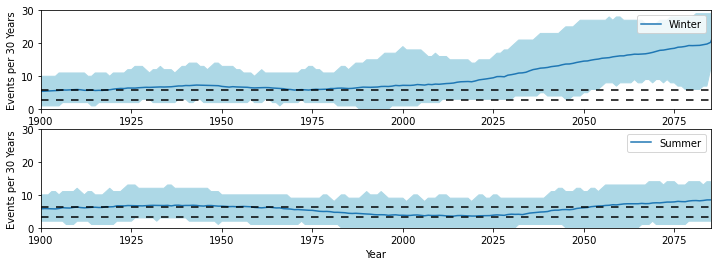

In [9]:
ax=emergePlot(
    compoundCountsXr.sel(fire='pos',experiment='ssp585',drop=True),
    compoundCountsXr.sel(fire='pos',experiment='piControl',drop=True),
    xlim=[1900,2085]
)
plt.xlabel('Year')

ax[0].legend(['Winter'])
ax[1].legend(['Summer'])

ax[0].set_ylim([0,30])
ax[1].set_ylim([0,30])

plt.savefig('figures/cmip6AllDryEmergence.pdf')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


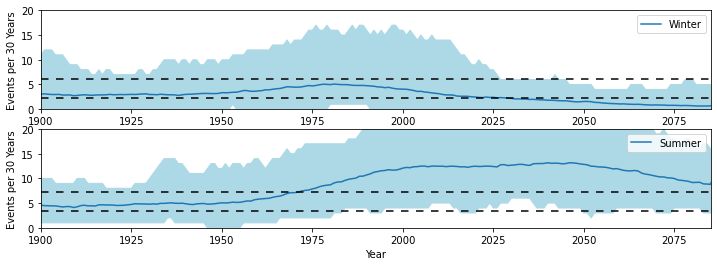

In [10]:
ax=emergePlot(
    compoundCountsXr.sel(fire='neg',experiment='ssp585',drop=True),
    compoundCountsXr.sel(fire='neg',experiment='piControl',drop=True)
)
plt.xlabel('Year')


ax[0].legend(['Winter'])
ax[1].legend(['Summer'])
ax[0].set_xlim([1900,2085])
ax[1].set_xlim([1900,2085])

ax[0].set_ylim([0,20])
ax[1].set_ylim([0,20])

plt.savefig('figures/cmip6AllWetEmergence.pdf')

# And by event type

It looks like there is a trend of increasing number of compounds, so lets look at which event pairs are most common

In [8]:
overlapBinFirePos=overlapBins.binSum(
    compoundXr.sel(fire='pos',experiment='ssp585',year=slice(1850,2099), drop=True)
)

In [9]:
overlapBinFireNeg=overlapBins.binSum(
    compoundXr.sel(fire='neg',experiment='ssp585',year=slice(1850,2099), drop=True)
)

In [10]:
%run utils/binPlot.ipynb

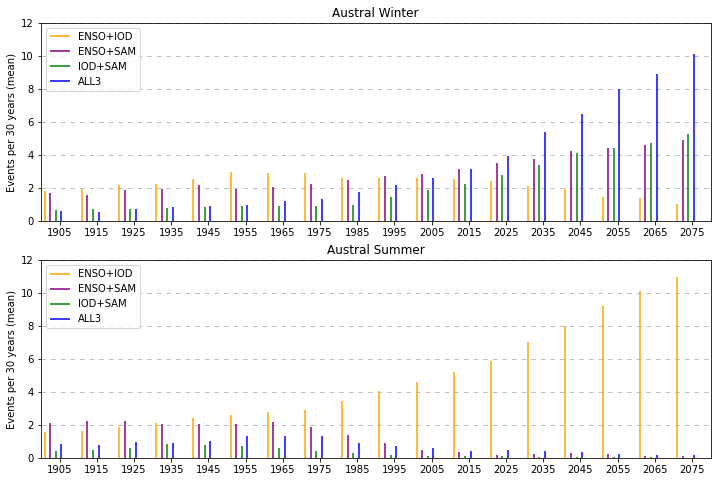

In [22]:
plt.figure(figsize=(12,8))

ax1=plt.subplot(2,1,1)

binPlot(
    overlapBinFirePos['ecCombinedDmiSamwinter'].to_dataset('compound'), 
    ax1
)

ax1.set_ylabel('Events per 30 years (mean)')
ax1.minorticks_off()
ax1.set_ylim([0,12])
plt.xlim([1900,2080])
plt.title('Austral Winter')
plt.grid(axis='y', dashes=(6,6))


ax2=plt.subplot(2,1,2)

binPlot(
    overlapBinFirePos['ecCombinedDmiSamsummer'].to_dataset('compound'), 
    ax2
)
ax2.set_ylabel('Events per 30 years (mean)')
ax2.minorticks_off()
ax2.set_ylim([0,12])
plt.xlim([1900,2080])
plt.title('Austral Summer')
plt.grid(axis='y', dashes=(6,6))

plt.savefig('figures/cmip6DryCompoundsByType.pdf')

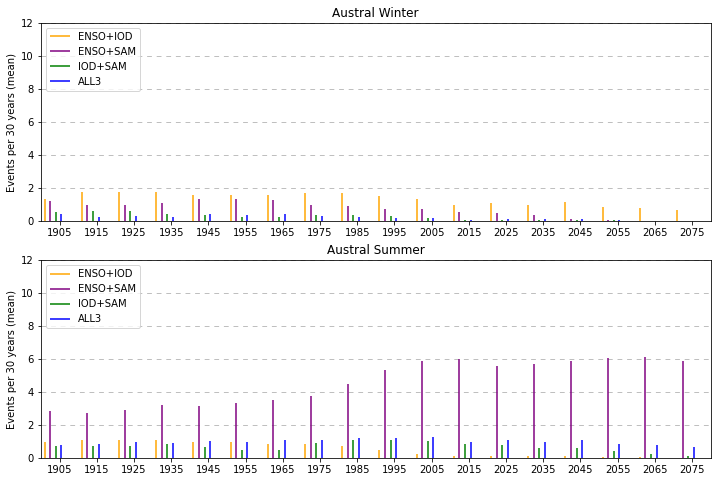

In [21]:
plt.figure(figsize=(12,8))

ax1=plt.subplot(2,1,1)

binPlot(
    overlapBinFireNeg['ecCombinedDmiSamwinter'].to_dataset('compound'), 
    ax1
)

ax1.set_ylabel('Events per 30 years (mean)')
ax1.minorticks_off()
ax1.set_ylim([0,12])
plt.xlim([1900,2080])
plt.title('Austral Winter')
plt.grid(axis='y', dashes=(6,6))


ax2=plt.subplot(2,1,2)

binPlot(
    overlapBinFireNeg['ecCombinedDmiSamsummer'].to_dataset('compound'), 
    ax2
)
ax2.set_ylabel('Events per 30 years (mean)')
ax2.minorticks_off()
ax2.set_ylim([0,12])
plt.xlim([1900,2080])
plt.title('Austral Summer')
plt.grid(axis='y', dashes=(6,6))

plt.savefig('figures/cmip6WetCompoundsByType.pdf')

# Time of emergence - Fire Pos / Dry

Do a plot to show time of emergence.
Using mean/min/max in each interval as the trend, and number of events (95%CI) in piControl as the baseline

In [30]:
compounds = [
    'all3','enso+iod','enso+sam','iod+sam'
]

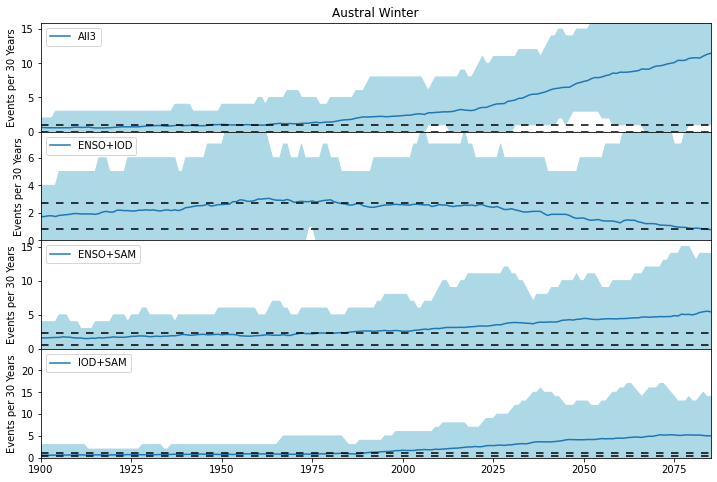

In [31]:
ax=emergePlot(
    firePos.ecCombinedDmiSamwinter.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'), 
    piConPos.ecCombinedDmiSamwinter.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'),
    xlim=[1900,2085]
)

ax[0].set_title('Austral Winter')
ax[0].legend(['All3'], loc='upper left')
ax[1].legend(['ENSO+IOD'], loc='upper left')
ax[2].legend(['ENSO+SAM'], loc='upper left')
ax[3].legend(['IOD+SAM'], loc='upper left')

ax[0].set_ylim([0,15.9])
ax[1].set_ylim([0,7.9])
ax[2].set_ylim([0,15.9])
ax[3].set_ylim([0,24.9])

[axx.set_xticklabels([]) for axx in ax[:-1]]

plt.subplots_adjust(hspace=0)


plt.savefig('figures/cmip6DryWinterCompoundEmergence.pdf')

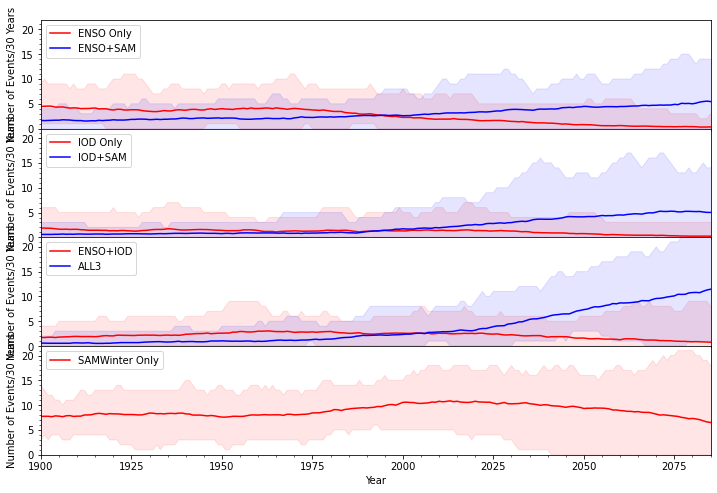

In [71]:
plt.figure(figsize=(12,8))
axx=list()
iPlot=1
for indexPair in [
    ['enso','enso+sam'],
    ['iod','iod+sam'],
    ['enso+iod','all3'],
    ['sam']
]:
    axx.append(plt.subplot(4,1,iPlot))
    overlaidEmergePlot(
        firePos.ecCombinedDmiSamwinter.sel(
            compound=indexPair
        ).to_dataset('compound').rolling(
            year=30,min_periods=15,center=True
        ).sum('year')
    )
    plt.xlim([1900,2085])
    plt.ylim([0,21.9])
    iPlot=iPlot+1

plt.subplots_adjust(hspace=0)
    

[ax.set_xticklabels([]) for ax in axx[:-1]]
    
axx[0].legend(['ENSO Only','ENSO+SAM'], loc='upper left')
axx[1].legend(['IOD Only','IOD+SAM'], loc='upper left')
axx[2].legend(['ENSO+IOD','ALL3'], loc='upper left')
axx[3].legend(['SAMWinter Only'], loc='upper left')

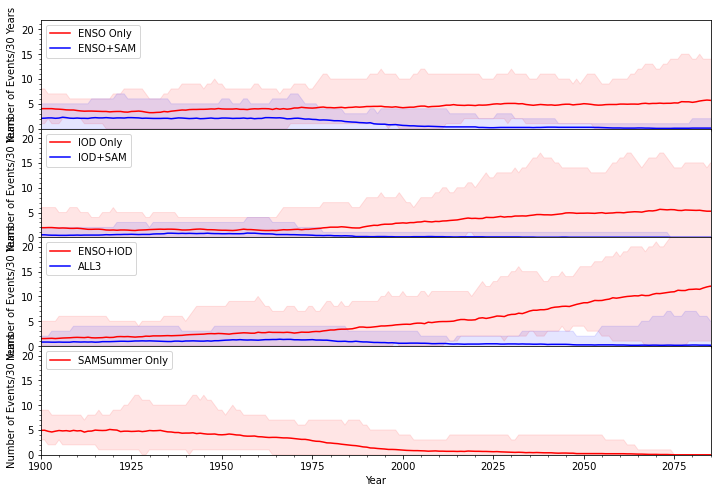

In [67]:
plt.figure(figsize=(12,8))
axx=list()
iPlot=1
for indexPair in [
    ['enso','enso+sam'],
    ['iod','iod+sam'],
    ['enso+iod','all3'],
    ['sam']
]:
    axx.append(plt.subplot(4,1,iPlot))
    overlaidEmergePlot(
        firePos.ecCombinedDmiSamsummer.sel(
            compound=indexPair
        ).to_dataset('compound').rolling(
            year=30,min_periods=15,center=True
        ).sum('year')
    )
    plt.xlim([1900,2085])
    plt.ylim([0,21.9])
    iPlot=iPlot+1

plt.subplots_adjust(hspace=0)
    
    

[ax.set_xticklabels([]) for ax in axx[:-1]]
    
axx[0].legend(['ENSO Only','ENSO+SAM'], loc='upper left')
axx[1].legend(['IOD Only','IOD+SAM'], loc='upper left')
axx[2].legend(['ENSO+IOD','ALL3'], loc='upper left')
axx[3].legend(['SAMSummer Only'], loc='upper left')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


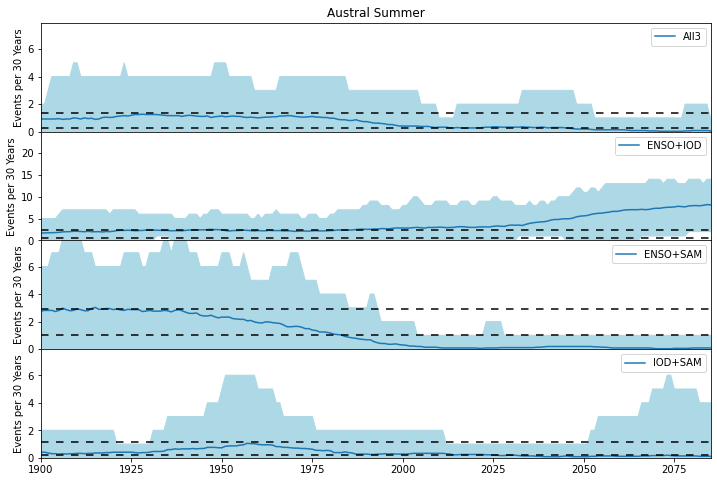

In [14]:
ax=emergePlot(
    firePos.ecCombinedDmiSamsummer.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'), 
    piConPos.ecCombinedDmiSamsummer.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'),
    xlim=[1900,2085]
)

ax[0].set_title('Austral Summer')
ax[0].legend(['All3'])
ax[1].legend(['ENSO+IOD'])
ax[2].legend(['ENSO+SAM'])
ax[3].legend(['IOD+SAM'])

ax[0].set_ylim([0,7.9])
ax[1].set_ylim([0,24.9])
ax[2].set_ylim([0,7.9])
ax[3].set_ylim([0,7.9])
[axx.set_xticklabels([]) for axx in ax[:-1]]

plt.subplots_adjust(hspace=0)


plt.savefig('figures/cmip6DrySummerCompoundEmergence.pdf')

# Time of Emergence - Fire Neg / Wet

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


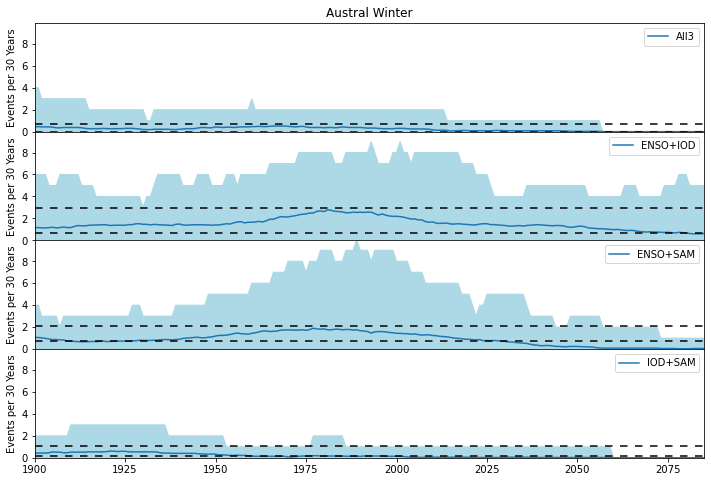

In [28]:
ax=emergePlot(
    fireNeg.ecCombinedDmiSamwinter.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'), 
    piConNeg.ecCombinedDmiSamwinter.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'),
    xlim=[1900,2085]
)

ax[0].set_title('Austral Winter')
ax[0].legend(['All3'])
ax[1].legend(['ENSO+IOD'])
ax[2].legend(['ENSO+SAM'])
ax[3].legend(['IOD+SAM'])

[axx.set_ylim([0,9.9]) for axx in ax]
[axx.set_xticklabels([]) for axx in ax[:-1]]

plt.subplots_adjust(hspace=0)




/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


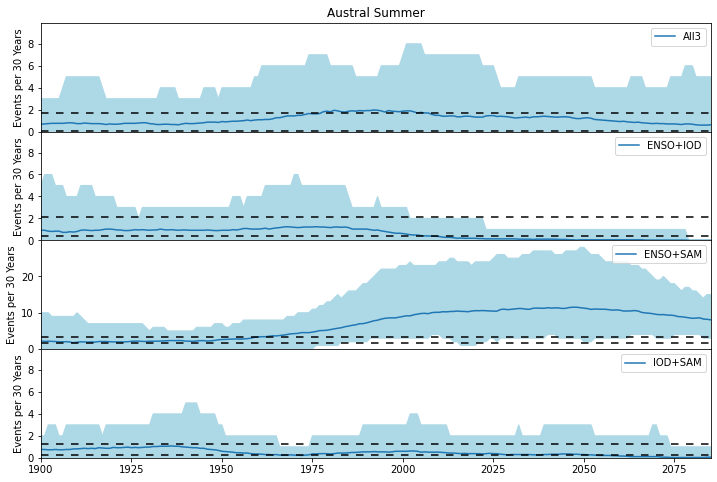

In [31]:
ax=emergePlot(
    fireNeg.ecCombinedDmiSamsummer.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'), 
    piConNeg.ecCombinedDmiSamsummer.sel(compound=compounds).to_dataset('compound').rolling(year=30,min_periods=15,center=True).sum('year'),
    xlim=[1900,2085]
)

ax[0].set_title('Austral Summer')
ax[0].legend(['All3'])
ax[1].legend(['ENSO+IOD'])
ax[2].legend(['ENSO+SAM'])
ax[3].legend(['IOD+SAM'])

[axx.set_ylim([0,9.9]) for axx in ax]
ax[2].set_ylim([0,29.9])
[axx.set_xticklabels([]) for axx in ax[:-1]]

plt.subplots_adjust(hspace=0)




# Index comparisons - ENSO

enso+iod


(1900.0, 2075.0)

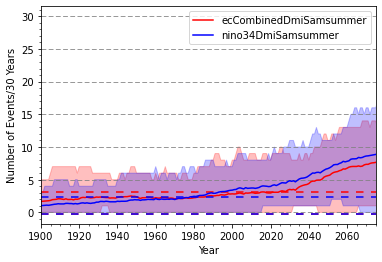

In [31]:
print('enso+iod')
overlaidEmergePlot(
        firePos[[
            'ecCombinedDmiSamsummer','nino34DmiSamsummer'
               ]].sel(compound='enso+iod').rolling(year=30,min_periods=15,center=True).sum('year'), 
        piConPos[[
            'ecCombinedDmiSamsummer','nino34DmiSamsummer'
                ]].sel(compound='enso+iod').rolling(year=30,min_periods=15,center=True).sum('year') 
)
#plt.legend(['El Niño+East IO','El Niño+DMI'])
plt.xlim([1900,2075])


enso+iod


(1900.0, 2075.0)

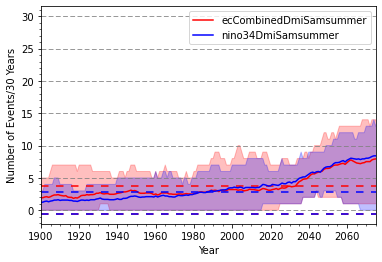

In [33]:
print('enso+iod')
overlaidEmergePlot(
        firePos[[
            'ecCombinedDmiSamsummer','nino34DmiSamsummer'
               ]].sel(compound='enso+iod',model=_model.wangModelSet).rolling(year=30,min_periods=15,center=True).sum('year'), 
        piConPos[[
            'ecCombinedDmiSamsummer','nino34DmiSamsummer'
                ]].sel(compound='enso+iod',model=_model.wangModelSet).rolling(year=30,min_periods=15,center=True).sum('year') 
)
#plt.legend(['El Niño+East IO','El Niño+DMI'])
plt.xlim([1900,2075])


enso+iod


(1900.0, 2075.0)

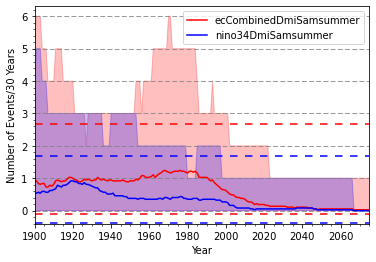

In [32]:
print('enso+iod')
overlaidEmergePlot(
        fireNeg[[
            'ecCombinedDmiSamsummer','nino34DmiSamsummer'
               ]].sel(compound='enso+iod').rolling(year=30,min_periods=15,center=True).sum('year'), 
        piConNeg[[
            'ecCombinedDmiSamsummer','nino34DmiSamsummer'
                ]].sel(compound='enso+iod').rolling(year=30,min_periods=15,center=True).sum('year') 
)
#plt.legend(['El Niño+East IO','El Niño+DMI'])
plt.xlim([1900,2075])


# Index comparisons - IOD

In [27]:
%run utils/emergence.ipynb

In [13]:
ioSummerXr=compoundXr[['nino34EastioSamsummer', 'nino34DmiSamsummer']]

In [14]:
allIoSummerXr=(
    ioSummerXr.sel(compound='enso+iod')
    +ioSummerXr.sel(compound='all3')
).rolling(year=30,min_periods=15,center=True).sum('year')

enso+iod


<ipython-input-28-deec781945c8>:6: UserWarning: The handle <matplotlib.lines.Line2D object at 0x14a3c720beb0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['ENSO+East IO','_nolegend_','_nolegend_','ENSO+DMI'])
<ipython-input-28-deec781945c8>:6: UserWarning: The handle <matplotlib.lines.Line2D object at 0x14a3c720b4c0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['ENSO+East IO','_nolegend_','_nolegend_','ENSO+DMI'])


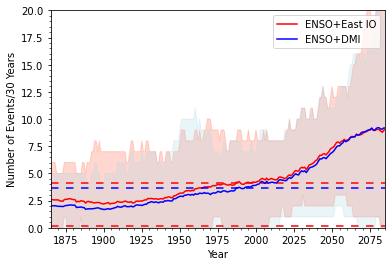

In [28]:
print('enso+iod')
overlaidEmergePlot(
        allIoSummerXr.sel(fire='pos',experiment='ssp585'), 
        allIoSummerXr.sel(fire='pos',experiment='piControl')
)
plt.legend(['ENSO+East IO','_nolegend_','_nolegend_','ENSO+DMI'])
plt.xlim([1865,2085])
plt.ylim([0,20])
plt.savefig('figures/ENSO+dmiandEastIOPos.pdf')

enso+iod


<ipython-input-29-09315f6501c7>:6: UserWarning: The handle <matplotlib.lines.Line2D object at 0x14a3c720ca00> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['ENSO+East IO','_nolegend_','_nolegend_','ENSO+DMI'])
<ipython-input-29-09315f6501c7>:6: UserWarning: The handle <matplotlib.lines.Line2D object at 0x14a3c729ad90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(['ENSO+East IO','_nolegend_','_nolegend_','ENSO+DMI'])


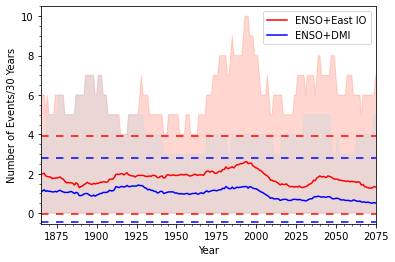

In [29]:
print('enso+iod')
overlaidEmergePlot(
        allIoSummerXr.sel(fire='neg',experiment='ssp585'), 
        allIoSummerXr.sel(fire='neg',experiment='piControl')
)
plt.legend(['ENSO+East IO','_nolegend_','_nolegend_','ENSO+DMI'])
plt.xlim([1865,2075])
plt.savefig('figures/ENSO+dmiandEastIONeg.pdf')